In [1]:
!pip install keras-visualizer

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from keras_visualizer import visualizer
from keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split as ts
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values   

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = ts(X, y, test_size=0.2, random_state=42, stratify=y)

learning_rate = float(input("Enter the learning rate (e.g., 0.001): "))

model = Sequential()
model.add(Dense(5, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
 
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=100,batch_size=10,callbacks=[early_stopping])

Enter the learning rate (e.g., 0.001):  0.001


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6612 - loss: 0.6225 - val_accuracy: 0.6429 - val_loss: 0.6131
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6743 - loss: 0.5931 - val_accuracy: 0.6494 - val_loss: 0.5956
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6726 - loss: 0.5708 - val_accuracy: 0.6558 - val_loss: 0.5818
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6743 - loss: 0.5519 - val_accuracy: 0.6688 - val_loss: 0.5736
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6971 - loss: 0.5355 - val_accuracy: 0.6623 - val_loss: 0.5677
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7052 - loss: 0.5220 - val_accuracy: 0.6753 - val_loss: 0.5625
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7264 - loss: 0.5101 - val_accuracy: 0.6753 - val_loss: 0.5594
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7313 - loss: 0.5016 - val_accuracy: 0.

In [7]:
visualizer(model, file_format='png', view=True)

Training Accuracy: 79.97%
Training Error: 20.03%

Validation Accuracy: 72.08%
Validation Error: 27.92%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 

Predicted Probabilities (first 10):
[0.57729447 0.18188773 0.21322374 0.3899308  0.00141916 0.21474679
 0.46552038 0.7099048  0.05524582 0.83063525]

Predicted Classes (first 10):
[1 0 0 0 0 0 0 1 0 1]

Actual Labels (first 10):
[0 0 0 1 0 0 1 1 0 0]


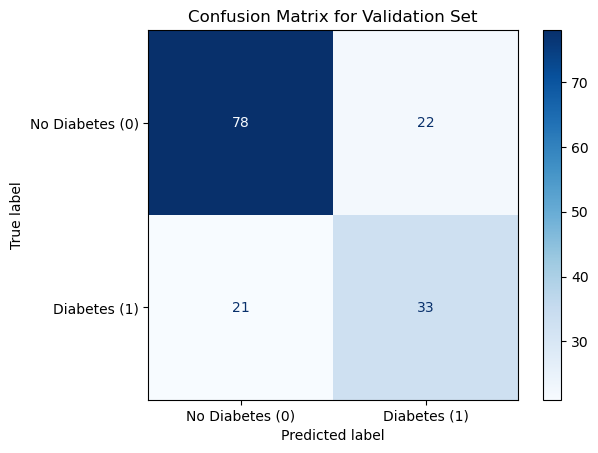


Confusion Matrix (numeric):
[[78 22]
 [21 33]]


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for dataset, X_data, y_data in [("Training", X_train, y_train), ("Validation", X_val, y_val)]:
    loss, accuracy = model.evaluate(X_data, y_data, verbose=0)
    error = 1 - accuracy
    print(f"{dataset} Accuracy: {accuracy * 100:.2f}%")
    print(f"{dataset} Error: {error * 100:.2f}%\n")


y_pred = model.predict(X_val) 
y_pred_class = (y_pred > 0.5).astype("int32")

print("\nPredicted Probabilities (first 10):")
print(y_pred[:10].flatten())

print("\nPredicted Classes (first 10):")
print(y_pred_class[:10].flatten())

print("\nActual Labels (first 10):")
print(y_val[:10])

c = confusion_matrix(y_val, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["No Diabetes (0)", "Diabetes (1)"])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix for Validation Set")
plt.show()

print("\nConfusion Matrix (numeric):")
print(c)


In [12]:
def get_user_input():
    print("Please enter the following details:")
    while True:
        try:
            pregnancies = float(input("Number of pregnancies: "))
            if 0 <= pregnancies <= 20:
                break
            else:
                print("Value must be between 0 and 20. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            glucose = float(input("Glucose level: "))
            if 0 <= glucose <= 300:
                break
            else:
                print("Value must be between 0 and 300. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            blood_pressure = float(input("Blood pressure: "))
            if 0 <= blood_pressure <= 200:
                break
            else:
                print("Value must be between 0 and 200. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            skin_thickness = float(input("Skin thickness: "))
            if 0 <= skin_thickness <= 100:
                break
            else:
                print("Value must be between 0 and 100. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            insulin = float(input("Insulin level: "))
            if 0 <= insulin <= 900:
                break
            else:
                print("Value must be between 0 and 900. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    
    while True:
        try:
            bmi = float(input("BMI: "))
            if 0 <= bmi <= 70:
                break
            else:
                print("Value must be between 0 and 70. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            diabetes_pedigree = float(input("Diabetes Pedigree Function: "))
            if 0 <= diabetes_pedigree <= 2.5:
                break
            else:
                print("Value must be between 0 and 2.5. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")

    while True:
        try:
            age = float(input("Age: "))
            if 0 <= age <= 120:
                break
            else:
                print("Value must be between 0 and 120. Try again.")
        except ValueError:
            print("Invalid input! Enter a numeric value.")


    user_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                           insulin, bmi, diabetes_pedigree, age]])
    user_data = scaler.transform(user_data)
    return user_data

def predict_diabetes():
    user_data = get_user_input()
    prediction = model.predict(user_data)

    if prediction[0] >= 0.5:
        print("The model predicts that you are diabetic.")
    else:
        print("The model predicts that you are not diabetic.")

predict_diabetes()


Please enter the following details:


Number of pregnancies:  as


Invalid input! Enter a numeric value.


Number of pregnancies:  20
Glucose level:  34
Blood pressure:  23
Skin thickness:  232


Value must be between 0 and 100. Try again.


Skin thickness:  2
Insulin level:  12
BMI:  23
Diabetes Pedigree Function:  22


Value must be between 0 and 2.5. Try again.


Diabetes Pedigree Function:  2
Age:  22


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
The model predicts that you are not diabetic.
